# Project Check-in Code
# Ben Alger, Mason Even, & Owen Pullam
# 4/25/2025
### This code runs off of the submitted CSV file due to the extensive time it took to scrape data.

## What is the correlation between movie ratings on platforms like IMDb, Metacritic, and Rotten Tomatoes and box office performance?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats

In [2]:
#Load data
movies = pd.read_csv("NewMovieData.csv", sep=",", na_values=["NA", "-", ""], encoding = 'utf-8')
movies.dropna(inplace=True)

In [35]:
#Data types
movies.dtypes

Title                            object
Decade Released                  object
Runtime (minutes)                 int64
Box Office                        int64
Genre                            object
Sub-Genre                        object
Studio                           object
Rotten Tomatoes (out of 100)    float64
IMDb (out of 100)               float64
Metacritic (out of 100)         float64
Director                         object
Starring                         object
Release Date                     object
Budget                            int64
Domestic Gross                    int64
Worldwide Gross                   int64
Total Gross                       int64
Net Gross                         int64
remake                            int64
Oscar Winner                      int64
RT > 80                            bool
Total Rating                    float64
dtype: object

In [3]:
#Statistics for Two Continuous Variables
correlation1 = movies['IMDb (out of 100)'].corr(movies['Worldwide Gross'])
print("Correlation between IMDb and box office earnings:", correlation1)

correlation2 = movies['Metacritic (out of 100)'].corr(movies['Worldwide Gross'])
print("Correlation between Metacritic and box office earnings:", correlation2)

correlation3 = movies['Rotten Tomatoes (out of 100)'].corr(movies['Worldwide Gross'])
print("Correlation between Rotten Tomatoes and box office earnings:", correlation3)

Correlation between IMDb and box office earnings: 0.06632628616753998
Correlation between Metacritic and box office earnings: -0.29930989643323264
Correlation between Rotten Tomatoes and box office earnings: -0.2763545648773724


P-value for IMDb correlation test: 0.7050158866243301


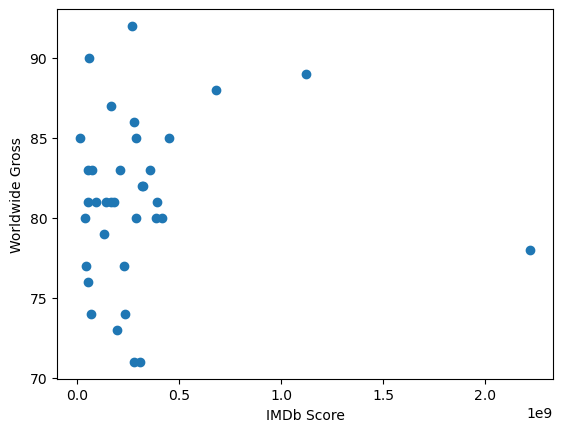

In [4]:
#Correlation test 1
ct = stats.pearsonr(movies['IMDb (out of 100)'], movies['Worldwide Gross'])
print("P-value for IMDb correlation test:", ct.pvalue)

#Visualization
plt.scatter(movies['Worldwide Gross'], movies['IMDb (out of 100)'])
plt.xlabel("IMDb Score")
plt.ylabel("Worldwide Gross")
plt.show()

P-value for IMDb correlation test: 0.7050158866243301


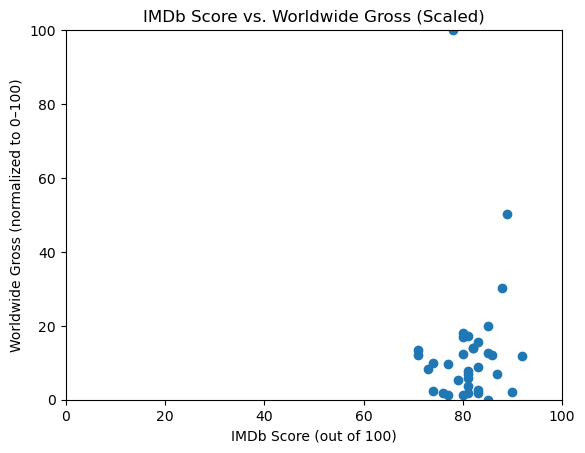

In [5]:
# Min-max scaling to 0–100
normalized_gross = 100 * (movies['Worldwide Gross'] - movies['Worldwide Gross'].min()) / (movies['Worldwide Gross'].max() - movies['Worldwide Gross'].min())

# Correlation test (original values, not scaled)
from scipy import stats
ct = stats.pearsonr(movies['IMDb (out of 100)'], movies['Worldwide Gross'])
print("P-value for IMDb correlation test:", ct.pvalue)

# Visualization with IMDb and scaled gross
import matplotlib.pyplot as plt
plt.scatter(movies['IMDb (out of 100)'], normalized_gross)
plt.xlabel("IMDb Score (out of 100)")
plt.ylabel("Worldwide Gross (normalized to 0–100)")
plt.title("IMDb Score vs. Worldwide Gross (Scaled)")
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.show()

P-value for Metacritic correlation test: 0.08068461035925033


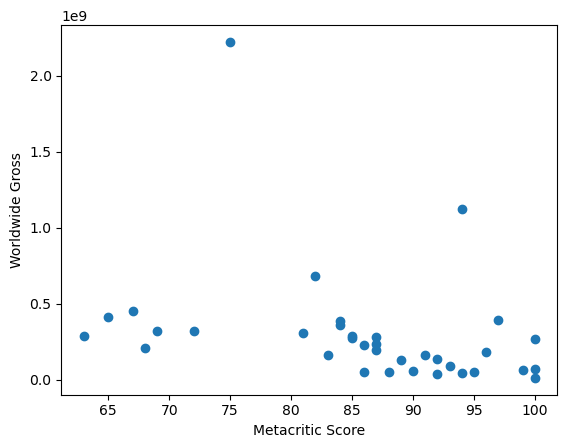

In [6]:
#Correlation test 2
ct = stats.pearsonr(movies['Metacritic (out of 100)'], movies['Worldwide Gross'])
print("P-value for Metacritic correlation test:", ct.pvalue)

#Visualization
plt.scatter(movies['Metacritic (out of 100)'], movies['Worldwide Gross'])
plt.xlabel("Metacritic Score")
plt.ylabel("Worldwide Gross")
plt.show()

P-value for Rotten Tomatoes correlation test: 0.10804719662208792


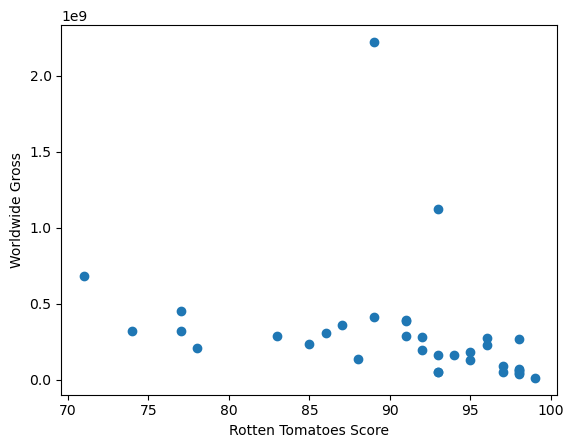

In [7]:
#Correlation test 3
ct = stats.pearsonr(movies['Rotten Tomatoes (out of 100)'], movies['Worldwide Gross'])
print("P-value for Rotten Tomatoes correlation test:", ct.pvalue)

#Visualization
plt.scatter(movies['Rotten Tomatoes (out of 100)'], movies['Worldwide Gross'])
plt.xlabel("Rotten Tomatoes Score")
plt.ylabel("Worldwide Gross")
plt.show()

In [8]:
#Predictions for IMDb
x_val = movies[['IMDb (out of 100)']]
y_val = movies['Worldwide Gross']
model1 = LinearRegression()
model1.fit(x_val,y_val)

prediction = model1.predict(x_val)
print(prediction)

[3.00302480e+08 3.05471884e+08 3.10641289e+08 3.10641289e+08
 2.95133076e+08 2.79624862e+08 3.10641289e+08 3.20980098e+08
 2.48608436e+08 3.36488311e+08 3.20980098e+08 3.00302480e+08
 3.05471884e+08 3.10641289e+08 3.41657715e+08 2.64116649e+08
 3.00302480e+08 3.31318907e+08 3.00302480e+08 2.95133076e+08
 2.48608436e+08 2.95133076e+08 3.00302480e+08 2.89963671e+08
 3.00302480e+08 3.20980098e+08 2.64116649e+08 2.79624862e+08
 3.57165929e+08 3.46827120e+08 2.74455458e+08 2.58947245e+08
 3.26149502e+08 2.95133076e+08 2.84794267e+08]


In [9]:
#Predictions for Metacritic
x_val = movies[['Metacritic (out of 100)']]
y_val = movies['Worldwide Gross']
model2 = LinearRegression()
model2.fit(x_val,y_val)

prediction = model2.predict(x_val)
print(prediction)

[1.85761664e+08 4.58955303e+08 2.76826210e+08 3.22358484e+08
 2.31293937e+08 2.99592347e+08 5.04487576e+08 1.40229391e+08
 3.56507688e+08 3.45124620e+08 5.15870644e+08 1.74378596e+08
 4.93104508e+08 1.40229391e+08 2.08527801e+08 1.51612459e+08
 2.42677006e+08 3.33741552e+08 2.31293937e+08 5.38636781e+08
 2.88209279e+08 3.22358484e+08 2.19910869e+08 2.65443142e+08
 2.99592347e+08 3.10975415e+08 2.88209279e+08 2.08527801e+08
 1.40229391e+08 2.54060074e+08 1.97144732e+08 2.88209279e+08
 3.10975415e+08 5.61402918e+08 4.24806098e+08]


In [10]:
#Predictions for Rotten Tomatoes
x_val = movies[['Rotten Tomatoes (out of 100)']]
y_val = movies['Worldwide Gross']
model3 = LinearRegression()
model3.fit(x_val,y_val)

prediction = model3.predict(x_val)
print(prediction)

[2.36749500e+08 5.40915116e+08 2.65717654e+08 3.52622115e+08
 1.93297269e+08 2.22265423e+08 4.82978808e+08 1.78813192e+08
 3.67106192e+08 5.84367347e+08 4.97462885e+08 2.94685808e+08
 4.97462885e+08 1.93297269e+08 2.65717654e+08 1.93297269e+08
 2.65717654e+08 2.51233577e+08 3.38138038e+08 3.23653961e+08
 2.80201731e+08 2.94685808e+08 2.07781346e+08 2.36749500e+08
 2.65717654e+08 2.94685808e+08 3.81590269e+08 1.93297269e+08
 1.93297269e+08 1.93297269e+08 2.07781346e+08 2.80201731e+08
 2.22265423e+08 4.10558423e+08 3.23653961e+08]


## Different Method/Visualization

Correlation between IMDb (out of 100) and Worldwide Gross:
  r = 0.066, p = 0.7050

Correlation between IMDb (out of 100) and Domestic Gross:
  r = 0.137, p = 0.4325

Correlation between Metacritic (out of 100) and Worldwide Gross:
  r = -0.299, p = 0.0807

Correlation between Metacritic (out of 100) and Domestic Gross:
  r = -0.332, p = 0.0514

Correlation between Rotten Tomatoes (out of 100) and Worldwide Gross:
  r = -0.276, p = 0.1080

Correlation between Rotten Tomatoes (out of 100) and Domestic Gross:
  r = -0.358, p = 0.0348



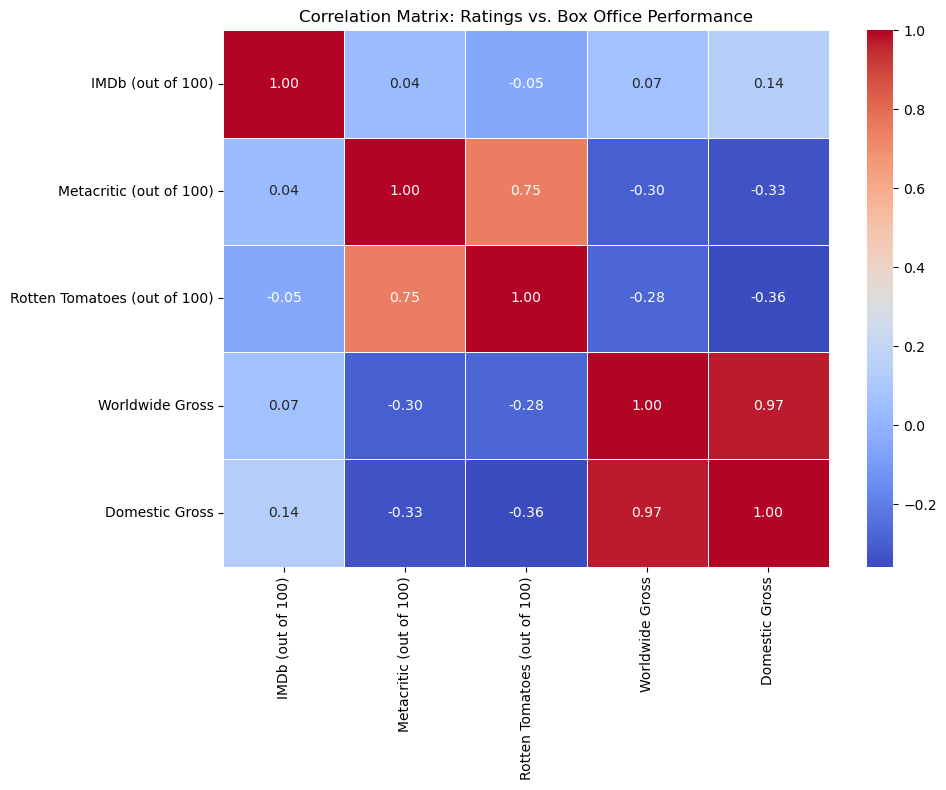

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Drop rows with missing values in relevant columns
ratings_gross = movies.dropna(subset=[
    'IMDb (out of 100)', 
    'Metacritic (out of 100)', 
    'Rotten Tomatoes (out of 100)', 
    'Worldwide Gross', 
    'Domestic Gross'
])

# Calculate and display individual correlations with p-values
ratings = ['IMDb (out of 100)', 'Metacritic (out of 100)', 'Rotten Tomatoes (out of 100)']
gross_metrics = ['Worldwide Gross', 'Domestic Gross']

correlation_results = {}

for rating in ratings:
    for gross in gross_metrics:
        r, p = pearsonr(ratings_gross[rating], ratings_gross[gross])
        correlation_results[(rating, gross)] = {'correlation': r, 'p_value': p}
        print(f"Correlation between {rating} and {gross}:")
        print(f"  r = {r:.3f}, p = {p:.4f}\n")

# Create a correlation matrix for visualization
corr_matrix = ratings_gross[ratings + gross_metrics].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix: Ratings vs. Box Office Performance")
plt.tight_layout()
plt.show()

## Different Visualizations for Scatter Plots

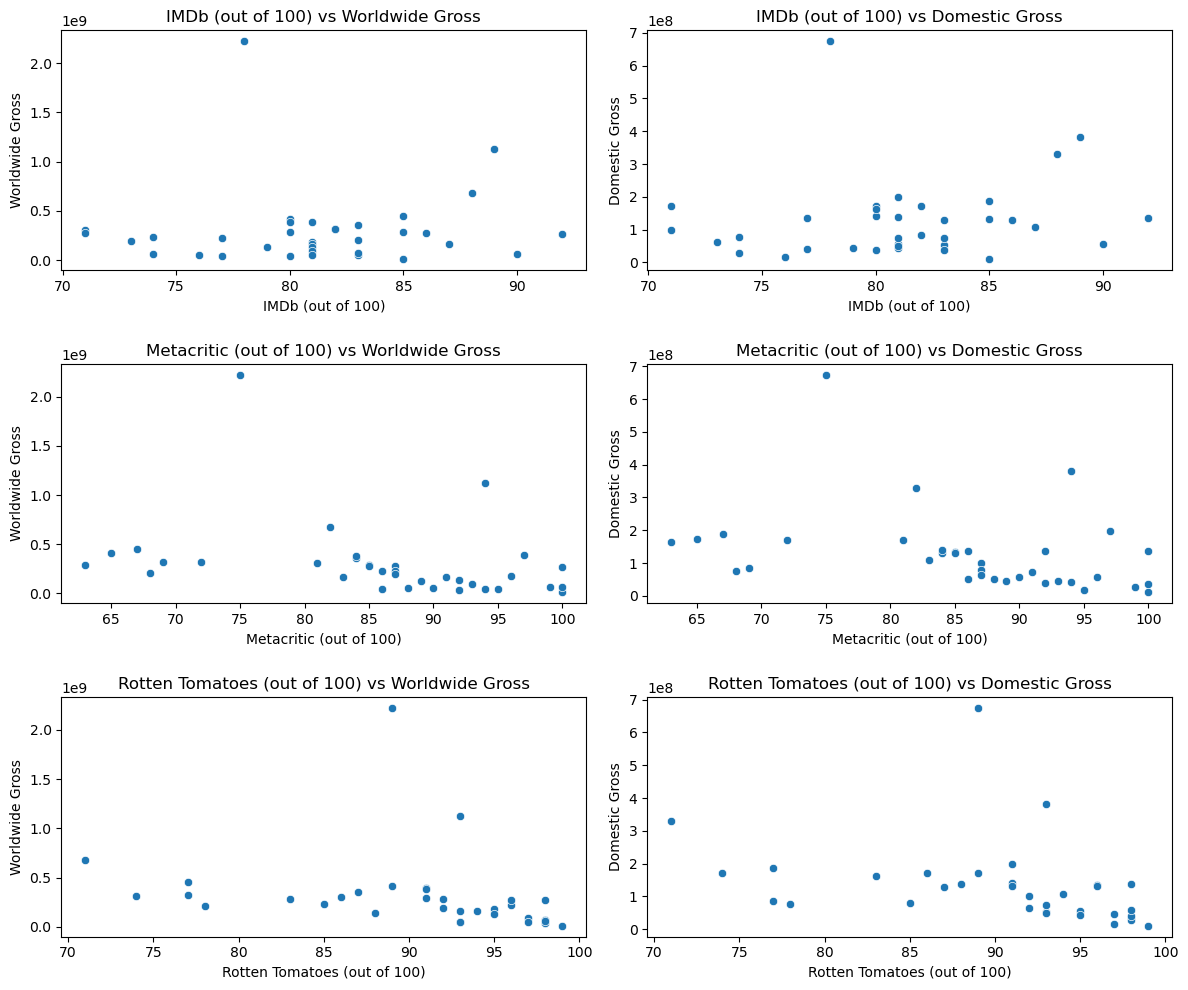

In [12]:
# Create scatter plots for each rating vs box office metric
plt.figure(figsize=(12, 10))

# Create subplots for each rating vs. box office metric
for i, rating in enumerate(ratings):
    for j, gross in enumerate(gross_metrics):
        plt.subplot(len(ratings), len(gross_metrics), i * len(gross_metrics) + j + 1)
        sns.scatterplot(x=ratings_gross[rating], y=ratings_gross[gross])
        plt.title(f"{rating} vs {gross}")
        plt.xlabel(rating)
        plt.ylabel(gross)

plt.tight_layout()
plt.show()

## Machine Learning

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [14]:
# Multiple Logistic Regression
X = movies[['Rotten Tomatoes (out of 100)','IMDb (out of 100)','Metacritic (out of 100)']]
y = movies['Worldwide Gross']

In [15]:
log_reg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)
y_pred

C:\Users\benal\anaconda4\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([ 10568246, 180765061,  51973029,  51973029,  49876984, 289660619,
       286213233], dtype=int64)

In [16]:
log_reg.score(X_test, y_test)

0.0

In [17]:
log_reg.score(X, y)

0.7428571428571429

## Budget vs.Box Office

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

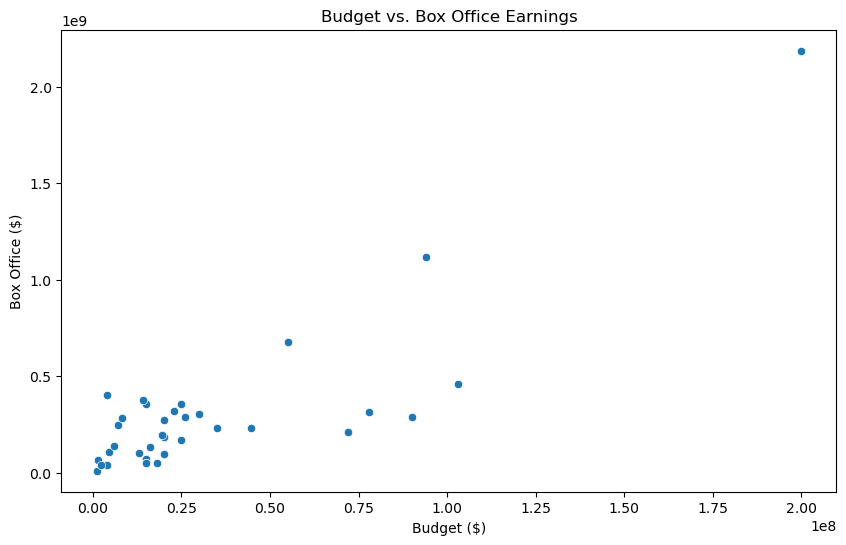

In [19]:
#Bivariate Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(data=movies, x='Budget', y='Box Office')
plt.title("Budget vs. Box Office Earnings")
plt.xlabel("Budget ($)")
plt.ylabel("Box Office ($)")
plt.show()

## Hypothesis Testing with Rotten Tomatoes and Box Office

In [20]:
#Define groups based on Rotten Tomatoes score
high_rt = movies[movies['Rotten Tomatoes (out of 100)'] > 80]['Box Office']
low_rt = movies[movies['Rotten Tomatoes (out of 100)'] <= 80]['Box Office']

In [21]:
#Perform t-test
t_stat, p_value = ttest_ind(high_rt.dropna(), low_rt.dropna(), equal_var=False)

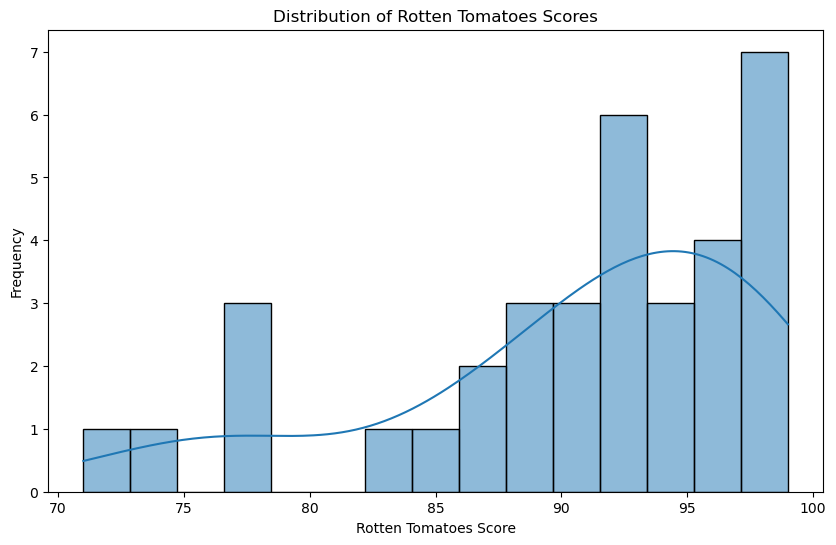

In [22]:
#Visualization 1: Histogram of Rotten Tomatoes scores
plt.figure(figsize=(10, 6))
sns.histplot(movies['Rotten Tomatoes (out of 100)'], kde=True, bins=15)
plt.title("Distribution of Rotten Tomatoes Scores")
plt.xlabel("Rotten Tomatoes Score")
plt.ylabel("Frequency")
plt.show()

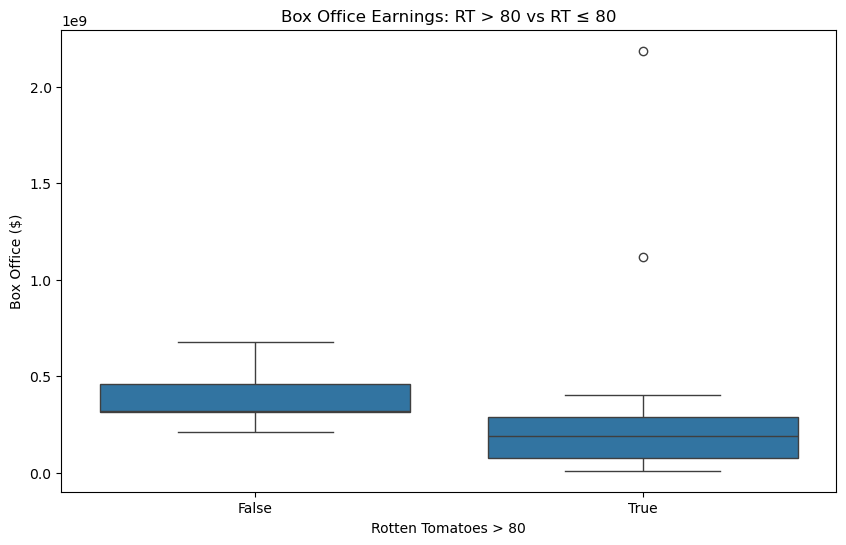

In [23]:
#Visualization 2: Boxplot of Box Office vs Rotten Tomatoes score groups
movies['RT > 80'] = movies['Rotten Tomatoes (out of 100)'] > 80
plt.figure(figsize=(10, 6))
sns.boxplot(data=movies, x='RT > 80', y='Box Office')
plt.title("Box Office Earnings: RT > 80 vs RT ≤ 80")
plt.xlabel("Rotten Tomatoes > 80")
plt.ylabel("Box Office ($)")
plt.show()

## Machine Learning: Linear Regression - Predicting box office revenue from Rotten Tomatoes and movie budget

In [24]:
#Select features and drop NA
ml_df = movies[['Budget', 'Rotten Tomatoes (out of 100)', 'Box Office']].dropna()

#Features and target
X = ml_df[['Budget', 'Rotten Tomatoes (out of 100)']]
y = ml_df['Box Office']

#Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Model training
model = LinearRegression()
model.fit(X_train, y_train)

#Predictions and metrics
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('R-Squared value:',r2)
print('Mean Squared Error:',mse)
print('Model Prediction:',y_pred)

R-Squared value: 0.12138178594206739
Mean Squared Error: 1.5141322299915578e+16
Model Prediction: [2.90825230e+08 1.85826578e+08 1.60368575e+08 1.41625901e+08
 7.02736932e+07 1.68707632e+08 2.25596903e+08]


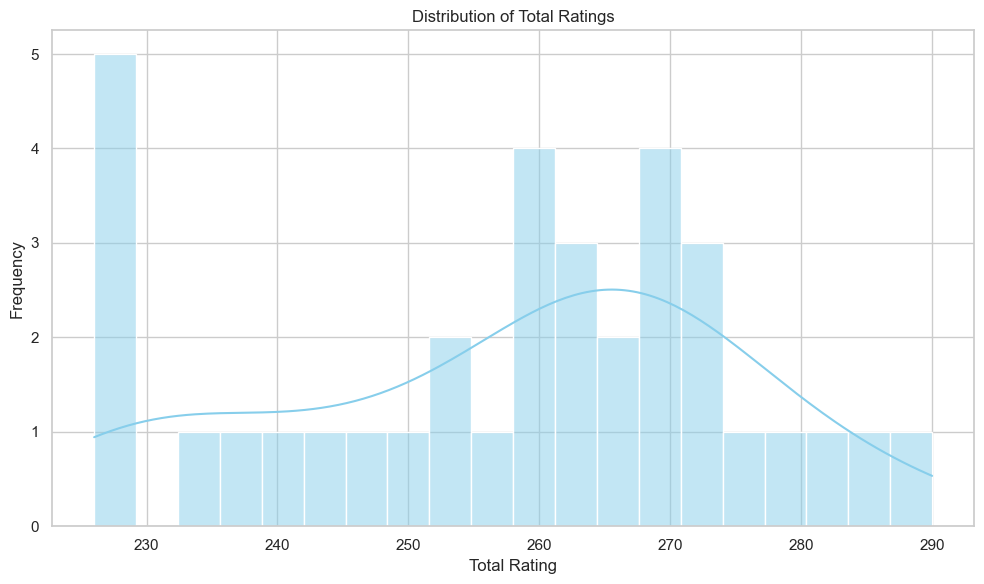

In [25]:
#Drop the 'Unnamed: 0' column
movies.drop(columns=['Unnamed: 0'], inplace=True)
movies.head()

#Combine the rating scores into a new column 'Total Rating'
movies['Total Rating'] = (
    movies['Rotten Tomatoes (out of 100)'] +
    movies['IMDb (out of 100)'] +
    movies['Metacritic (out of 100)']
)
# Distribution of Total Rating
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(movies['Total Rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Total Ratings')
plt.xlabel('Total Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## Do movies with longer runtimes tend to have higher or lower box office earnings?

In [26]:
#Describing Runtime to better understand for analysis
runtime_desc = movies['Runtime (minutes)'].describe()
runtime_desc

count     35.000000
mean     144.485714
std       36.174716
min       93.000000
25%      120.000000
50%      133.000000
75%      168.500000
max      233.000000
Name: Runtime (minutes), dtype: float64

In [27]:
#Describing Box Office to better understand for analysis
box_office_desc = movies['Box Office'].describe()
box_office_desc

count    3.500000e+01
mean     2.984802e+08
std      3.899636e+08
min      1.046250e+07
25%      1.006451e+08
50%      2.319764e+08
75%      3.166212e+08
max      2.187464e+09
Name: Box Office, dtype: float64

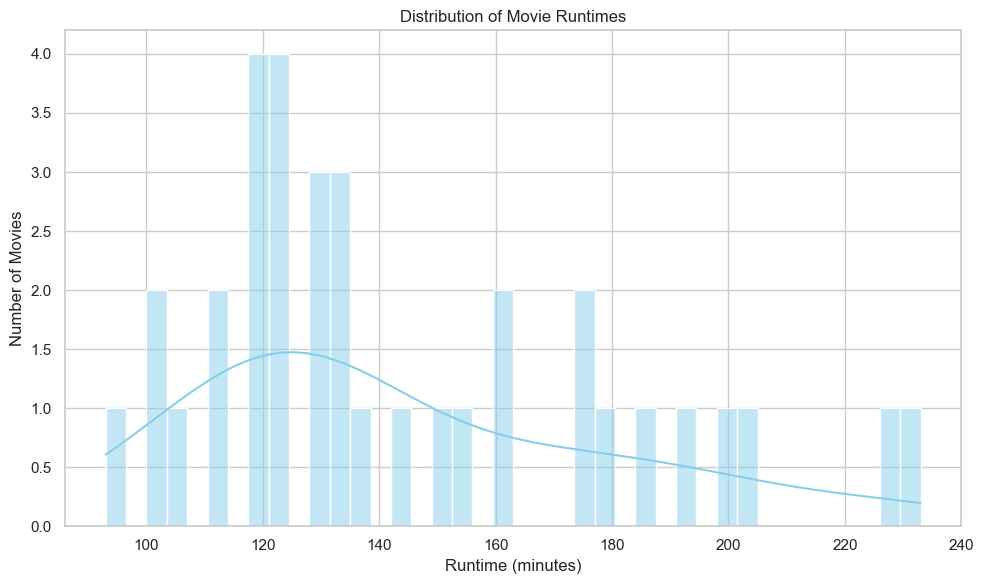

In [28]:
#Distribution of Movie Runtimes
plt.figure(figsize=(10, 6))
sns.histplot(movies['Runtime (minutes)'], bins=40, kde=True, color='skyblue')
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.show()

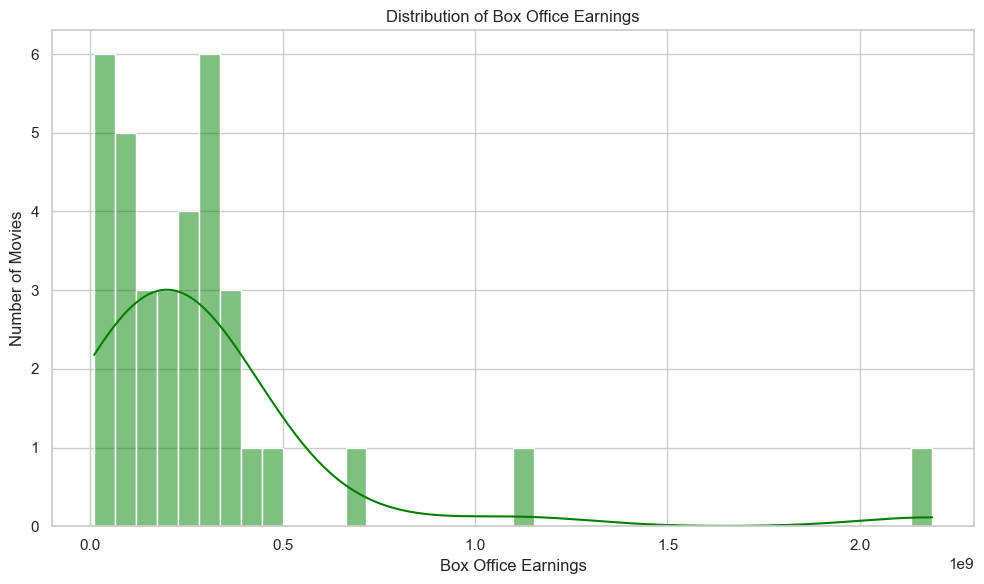

In [29]:
#Distribution of Box Office Earnings
plt.figure(figsize=(10, 6))
sns.histplot(movies['Box Office'].dropna(), bins=40, kde=True, color='green')
plt.title('Distribution of Box Office Earnings')
plt.xlabel('Box Office Earnings')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.show()

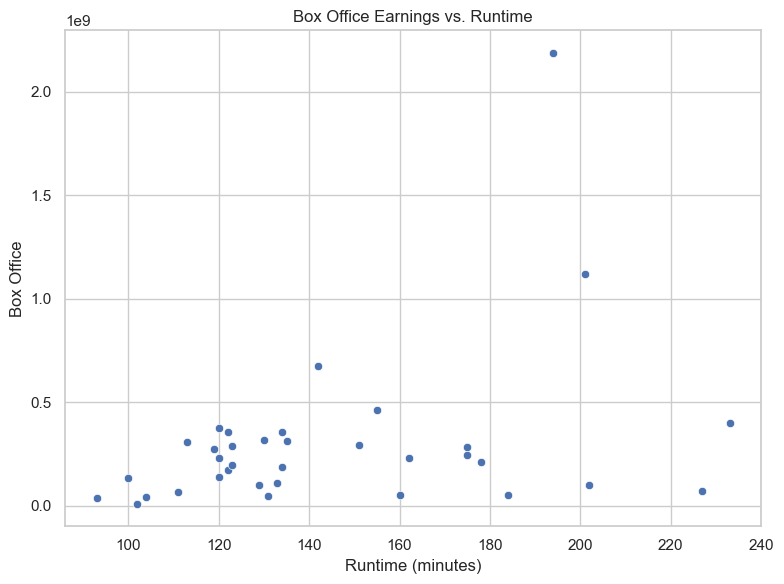

In [30]:
#Scatter Plot explaining Box Office Earnings vs Runtime for movies
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Runtime (minutes)', y='Box Office', data=movies)
plt.title('Box Office Earnings vs. Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Box Office')
plt.grid(True)
plt.tight_layout()
plt.show()

Pearson Correlation Coefficient: 0.350
P-value for Runtime vs. Box Office correlation test: 0.0393


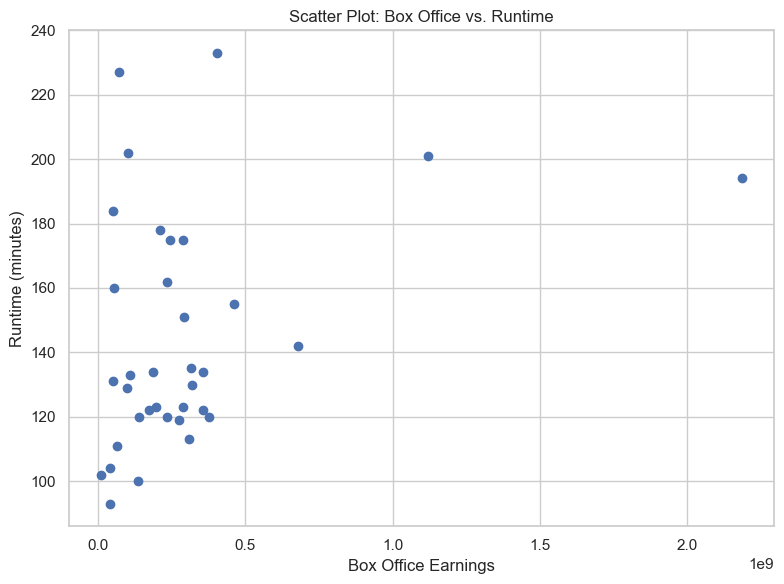

In [31]:
#Pearson Correlation Test between Runtime and Box Office
correlation, p_value = stats.pearsonr(movies['Runtime (minutes)'], movies['Box Office'])
print(f"Pearson Correlation Coefficient: {correlation:.3f}")
print(f"P-value for Runtime vs. Box Office correlation test: {p_value:.4f}")

#Visualization
plt.figure(figsize=(8, 6))
plt.scatter(movies['Box Office'], movies['Runtime (minutes)'])
plt.title("Scatter Plot: Box Office vs. Runtime")
plt.xlabel("Box Office Earnings")
plt.ylabel("Runtime (minutes)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [32]:
#Prepare data for Machine Learning
data = movies[['Runtime (minutes)', 'Box Office']].dropna()
X = data[['Runtime (minutes)']]
y = data['Box Office']

#Train/test split (Runtime vs Box Office Earnings)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Fit model with Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

#Predict and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"R^2: {r2:.3f}")

MAE: 380373131.19
R^2: -12.353


C:\Users\benal\anaconda4\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


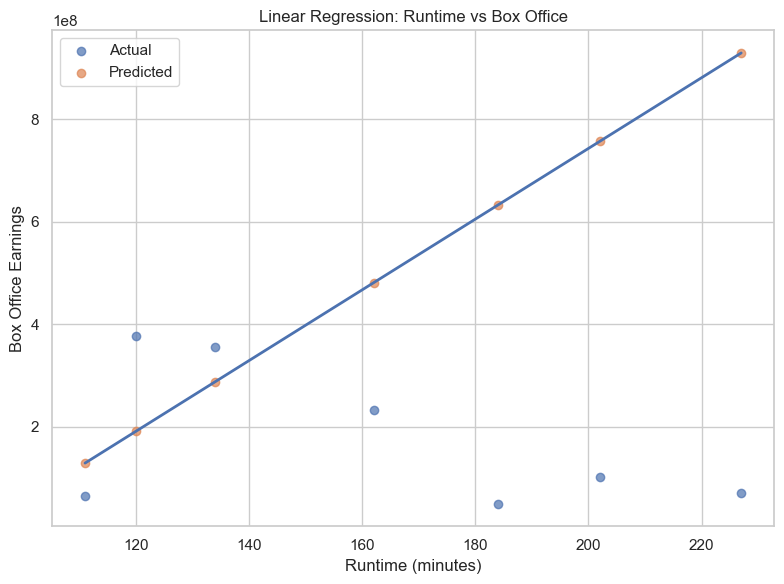

In [33]:
#Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, label='Actual', alpha=0.7)
plt.scatter(X_test, y_pred, label='Predicted', alpha=0.7)
#Regression line
x_line = np.linspace(X_test.min(), X_test.max(), 100).reshape(-1, 1)
y_line = model.predict(x_line)
plt.plot(x_line, y_line, linewidth=2)
plt.xlabel('Runtime (minutes)')
plt.ylabel('Box Office Earnings')
plt.title('Linear Regression: Runtime vs Box Office')
plt.legend()
plt.tight_layout()
plt.show()